In [0]:
%tensorflow_version 1.x
import sys
sys.path.append('/content/drive/My Drive/Colab_Work/PPM/nn/conv')
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from shallownet import ShallowNet
from keras.optimizers import SGD
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

In [5]:
print("[INFO] loading CIFAR-10 data...")

((trainX, trainY), (testX, testY)) = cifar10.load_data()

trainX = trainX.astype("float")/255.0
testX = testX.astype("float")/255.0

trainY = LabelBinarizer().fit_transform(trainY)
testY = LabelBinarizer().fit_transform(testY)

labelNames = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

[INFO] loading CIFAR-10 data...


In [6]:
print("[INFO] compiling model...")
opt = SGD(lr=0.01)
model = ShallowNet.build(width=32, height=32, depth=3, classes=10)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] compiling model...







In [7]:
print("[INFO] training network...")
H = model.fit(trainX,  trainY, validation_data=(testX, testY), batch_size=32, epochs=40, verbose=1)

[INFO] training network...
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 50000 samples, validate on 10000 samples
Epoch 1/40





50000/50000 [==============================] - 19s 380us/step - loss: 1.8045 - acc: 0.3687 - val_loss: 1.7459 - val_acc: 0.3864
Epoch 2/40
50000/50000 [==============================] - 6s 124us/step - loss: 1.5626 - acc: 0.4607 - val_loss: 1.5077 - val_acc: 0.4618
Epoch 3/40
50000/50000 [==============================] - 6s 123us/step - loss: 1.3981 - acc: 0.5119 - val_loss: 1.4251 - val_acc: 0.5015
Epoch 4/40
50000/50000 [==============================] - 6s 124us/step - loss: 1.3038 - acc: 0.5446 - val_loss: 1.3847 - val_acc: 0.5032
Epoch 5/40
50000/50000 [==============================] - 6s 122us/step - loss: 1.2506 - acc: 0.5645 - val_loss: 1.3373 - val_acc: 0.5157
Epoch 6/40
50000/50000 [==============================] - 6s 122us/step - loss: 1.2087 - acc: 0.5770 - val_loss: 1.2739 - val_acc:

In [8]:
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames))

[INFO] evaluating network...
              precision    recall  f1-score   support

    airplane       0.73      0.49      0.59      1000
  automobile       0.77      0.67      0.72      1000
        bird       0.46      0.45      0.46      1000
         cat       0.45      0.40      0.42      1000
        deer       0.59      0.47      0.52      1000
         dog       0.53      0.47      0.50      1000
        frog       0.60      0.80      0.69      1000
       horse       0.59      0.74      0.65      1000
        ship       0.75      0.70      0.72      1000
       truck       0.59      0.78      0.67      1000

    accuracy                           0.60     10000
   macro avg       0.60      0.60      0.59     10000
weighted avg       0.60      0.60      0.59     10000



/content/drive/My Drive/Colab_Work


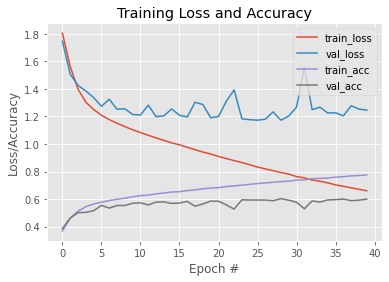

In [9]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 40), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 40), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 40), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 40), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
%cd /content/drive/My\ Drive/Colab_Work
plt.savefig('shallownet_cifar10_train_test_plot.png')